In [166]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

## Crix Calculation

From the published paper:
$$\text{CRIX}_t(k, \beta) = \frac{\sum_{i=1}^k
\beta_{i,0}P_{it}Q_{i,t_l^-}}
{\text{Divisor}_{t_l^-}(k, \beta)}$$

$$
\text{Divisor}_{0}(k, \beta) = \frac{\sum_{i=1}^k
\beta_{i,0}P_{i0}Q_{i,0}}
{\text{Starting Value}},
$$

$\text{Divisor}_{t_l^-}(k, \beta)$ is not described in the original paper. 


## Self-financing CRIX
We use the "weight" given by Ilyas to calculate a self-financing CRIX. 
The starting value is 1,000, meaning the initial investment to the portfolio of cryptos is 1,000 USD. 
The 1,000 USD is used to purchase constitutents with the opening price of the period. 





In [304]:
weights = pd.read_csv('CRIX_weights.csv')
columns = weights.columns
weights.columns = ['Date'] + list(columns[1:])
weights.Date = pd.to_datetime(weights.Date)
weights.index= weights.Date
weights.drop_duplicates(['btc', 'eth'], inplace=True)
weights = weights.drop('Date', axis=1)


weights = weights.loc[(weights.index >= '20180530') & (weights.index <= '20210530') ,:] # start day = 20180601 and end day = 20210530

In [305]:
weights

,btc,eth,xrp,ltc,xmr,bch,link,eos,bnb,xem,ada,dot,etc,bsv,dash
Date,,,,,,,,,,,,,,,
2018-06-01,0.524909,0.244543,0.103229,NaN,NaN,0.081685,NaN,0.045635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-01,0.539048,0.240736,0.102558,NaN,NaN,0.072450,NaN,0.045209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01,0.589121,0.224024,0.087804,NaN,NaN,0.064122,NaN,0.034929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-01,0.651087,0.185069,0.077450,NaN,NaN,0.057435,NaN,0.028958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-01,0.685571,0.140225,0.091654,NaN,NaN,0.052188,NaN,0.030363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-01,0.676335,0.130115,0.113453,NaN,NaN,0.049245,NaN,0.030851,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-01,0.667096,0.124057,0.129748,NaN,NaN,0.046657,NaN,0.032441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01,0.682963,0.119273,0.146619,NaN,NaN,0.025645,NaN,0.025500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-01,0.668416,0.138323,0.141692,NaN,NaN,0.024921,NaN,0.026648,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [306]:
coins = list(weights.columns)

In [307]:
def get_monthly_price(df, y,m):
    _id = (df.index.year == y) & (df.index.month==m)
    return df.loc[_id,:]

In [308]:
y_arr = weights.index.year
m_arr = weights.index.month

In [264]:
def read_price(path, coin):
    ls = os.listdir(path)
    for l in ls:
        if l.endswith(coin+'.csv'):
            df = pd.read_csv(path+l)
            df.index = pd.to_datetime(df.date)
            try:
                df.index = df.index.tz_localize('utc')
            except:
#                 print('already tz aware')
                pass
            df = df.loc[:,['open', 'high', 'low', 'close']]
            return df

eth                                  open        high         low       close
date                                                                     
2017-12-15 00:00:00+00:00  693.705453  699.923189  660.989366  671.072298
2017-12-15 01:00:00+00:00  666.705166  678.754607  642.708071  644.013241
2017-12-15 02:00:00+00:00  650.442870  660.803540  610.939823  636.680431
2017-12-15 03:00:00+00:00  635.908931  669.986439  625.717742  660.413375
2017-12-15 04:00:00+00:00  657.210059  670.629993  653.099376  658.177710
xrp                                open      high       low     close
date                                                             
2017-12-15 00:00:00+00:00  0.844636  0.858732  0.693756  0.743934
2017-12-15 01:00:00+00:00  0.744278  0.782502  0.677690  0.702767
2017-12-15 02:00:00+00:00  0.708238  0.734964  0.612976  0.682377
2017-12-15 03:00:00+00:00  0.686333  0.774045  0.650475  0.732575
2017-12-15 04:00:00+00:00  0.734713  0.757766  0.710964  0.735868
ltc         

In [520]:
last_month_last_value = 1000 #starting value


CRIX_arr = []

for i in range(len(y_arr)):
    print(i, y_arr[i], m_arr[i], last_month_last_value)
    
    w = get_monthly_price(weights, y_arr[i], m_arr[i])

    btc = read_price('prices/', 'btc')
    btc = get_monthly_price(btc, y_arr[i],m_arr[i])

    CRIX = w.loc[:,'btc'].values[0]*btc/btc.iloc[0,:]
    print('btc', w.loc[:,'btc'].values[0])
    for c in coins[1:]:
        if w.loc[:,c].values[0] > 0:
            print(c, w.loc[:,c].values[0])
            df = read_price('prices/', c)
            df = get_monthly_price(df, y_arr[i],m_arr[i])
            CRIX += w.loc[:,c].values[0]*df/df.iloc[0,:]
            if np.sum(np.sum(CRIX.isna()))>0:
                print(c, y_arr[i], m_arr[i], 'missing value!')
                

    CRIX *= last_month_last_value   
    CRIX.dropna(inplace=True)
    last_month_last_value = CRIX.iloc[-1,-1]
    
    CRIX_arr.append(CRIX)

0 2018 6 1000
btc 0.5249086854610296
eth 0.2445425384348523
xrp 0.1032289919300195
bch 0.0816848214185569
eos 0.0456349627555416
1 2018 7 811.0113998005353
btc 0.5390479232185622
eth 0.2407355595301978
xrp 0.1025579217609721
xrp 2018 7 missing value!
bch 0.0724499948294479
bch 2018 7 missing value!
eos 0.0452086006608198
eos 2018 7 missing value!
2 2018 8 886.4977791394161
btc 0.5891207363310536
eth 0.2240243686437934
xrp 0.0878040135548218
bch 0.0641216913498381
eos 0.0349291901204931
eos 2018 8 missing value!
3 2018 9 734.9888629387219
btc 0.6510870715969045
eth 0.1850694614546451
xrp 0.0774497311530107
bch 0.0574352855700866
eos 0.0289584502253531
4 2018 10 719.1550688349714
btc 0.6855705126851568
eth 0.1402252235560745
xrp 0.0916535535332237
bch 0.0521876845300615
eos 0.0303630256954831
eos 2018 10 missing value!
5 2018 11 657.0586330186425
btc 0.6763352276257989
eth 0.1301151794523312
xrp 0.1134531323248603
bch 0.0492452468267481
eos 0.0308512137702614
6 2018 12 419.31070373670013

In [522]:
CRIX_arr[-1]

,open,high,low,close
date,,,,
2021-05-01 00:00:00+00:00,5733.661247,5733.661247,5733.661247,5733.661247
2021-05-01 01:00:00+00:00,5736.430425,5784.615382,5722.074575,5806.101402
2021-05-01 02:00:00+00:00,5791.896175,5813.204628,5775.747846,5803.367404
2021-05-01 03:00:00+00:00,5788.117031,5801.345950,5803.966659,5812.026607
2021-05-01 04:00:00+00:00,5798.077341,5797.533578,5776.605759,5801.371786
...,...,...,...,...
2021-05-31 19:00:00+00:00,4007.464407,4031.500194,4004.753467,4044.854544
2021-05-31 20:00:00+00:00,4035.748087,4047.932211,4014.084158,4021.450339
2021-05-31 21:00:00+00:00,4012.339659,4053.013014,4021.889176,4054.298289


In [525]:
CRIX = pd.concat(CRIX_arr, axis=0)

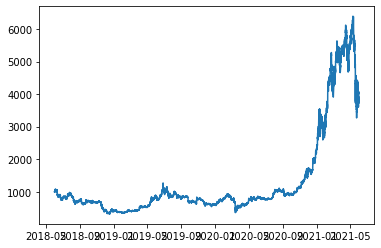

In [524]:
import matplotlib.pyplot as plt

plt.plot(pd.concat(CRIX_arr, axis=0).open)

In [526]:
CRIX.to_csv('CRIX_hourly_Tiingo.csv')

In [529]:
CRIX.index

DatetimeIndex(['2018-06-01 00:00:00+00:00', '2018-06-01 01:00:00+00:00',
               '2018-06-01 02:00:00+00:00', '2018-06-01 03:00:00+00:00',
               '2018-06-01 04:00:00+00:00', '2018-06-01 05:00:00+00:00',
               '2018-06-01 06:00:00+00:00', '2018-06-01 07:00:00+00:00',
               '2018-06-01 08:00:00+00:00', '2018-06-01 09:00:00+00:00',
               ...
               '2021-05-31 14:00:00+00:00', '2021-05-31 15:00:00+00:00',
               '2021-05-31 16:00:00+00:00', '2021-05-31 17:00:00+00:00',
               '2021-05-31 18:00:00+00:00', '2021-05-31 19:00:00+00:00',
               '2021-05-31 20:00:00+00:00', '2021-05-31 21:00:00+00:00',
               '2021-05-31 22:00:00+00:00', '2021-05-31 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=26033, freq=None)

In [533]:
import os
os

<module 'os' from '/Users/francis/opt/anaconda3/lib/python3.7/os.py'>